In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

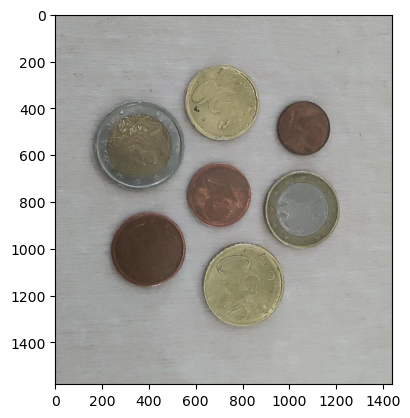

In [2]:
src = cv.imread("archives/monedas.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

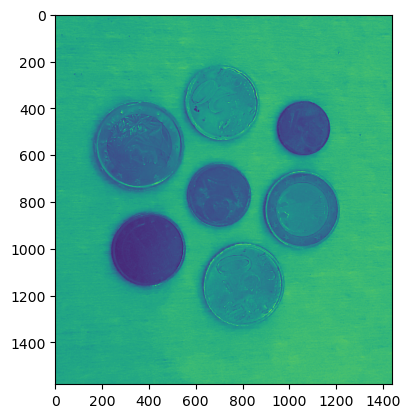

In [3]:
img1 = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

plt.imshow(img1)

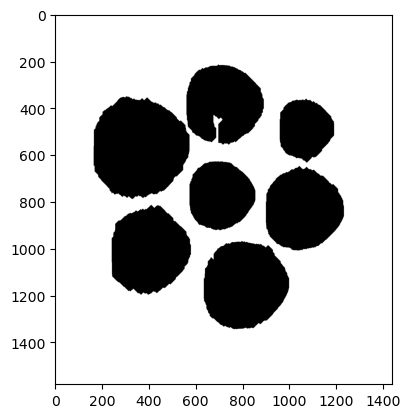

In [4]:
# Pasamos la imagen por el threshold para dividirla en dos colores [blanco, negro]
_, th1 = cv.threshold(img1, 144,255, cv.THRESH_BINARY)

# Acentuamos los colore que se han quedado grisaceos para que la imagen quede 
# en negro las monedas y en blanco el fondo
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2,5))
img2 = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel, iterations=5)
img2 = cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel, iterations=20)

plt.imshow(img2, cmap="gray")

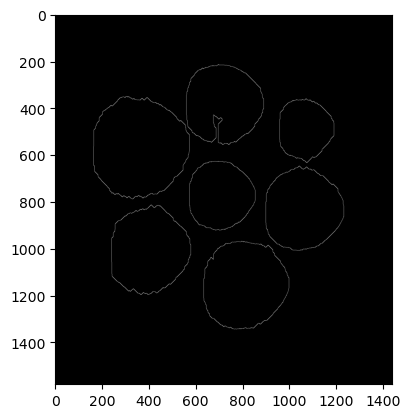

In [5]:
# creamos los contornos
umbral_minimo = 50
umbral_maximo = 100
cn = cv.Canny(img2, umbral_minimo, umbral_maximo)
plt.imshow(cn, cmap="gray")

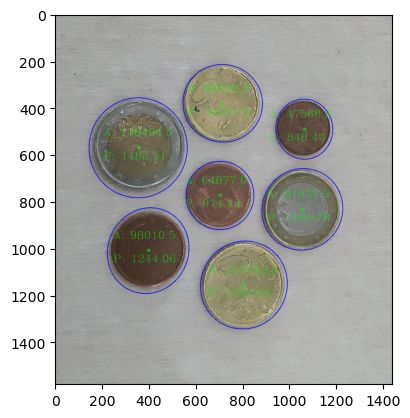

In [6]:
# Recoge las monedas en una tupla
contornos, jerarquia = cv.findContours(cn.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 
# print(len(contornos))
src2 = src.copy()
# Por cada moneda calculamos y dibujamos el centro el area y el perimetro
for cnt in contornos:
    M = cv.moments(cnt)

    if M['m00'] != 0:
        cx = int(M["m10"]/M['m00'])
        cy = int(M["m01"]/M['m00'])
        # print(f"Centro: {cx}, {cy}")
        cv.circle(src2, (cx, cy), 5, (0, 255, 0), 2) # dibujamos un circulo en el centro de cada moneda

        area = cv.contourArea(cnt)
        perimetro = cv.arcLength(cnt, True)
        perimetro_f = "{:.2f}".format(perimetro)
        # print(f"Area - {area}    Perimetro - {perimetro}")
        # Escribimos el area y el perimetro de cada moneda
        cv.putText(img=src2, text=str(f"A: {area}"), org=(cx-150,cy-50), 
                    fontFace=cv.FONT_HERSHEY_COMPLEX, fontScale=1.5, color=(0,255,0))
        cv.putText(img=src2, text=str(f"P: {perimetro_f}"), org=(cx-150,cy+50), 
                    fontFace=cv.FONT_HERSHEY_COMPLEX, fontScale=1.5, color=(0,255,0))

        elipse = cv.fitEllipse(cnt) 
        cv.ellipse(src2, elipse,  (0,0,255), 2)

plt.imshow(src2)